In [73]:
import pandas as pd
import geocoder
import unicodecsv
import logging
import time
import csv
import math

In [228]:
import matplotlib.pyplot as plt

In [2]:
file = pd.read_csv("NYPD.csv")

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
file1 = file.ix[file['OFNS_DESC'] == 'FRAUDS']
file1

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
89,242903059,12/31/2015,20:40:00,12/31/2015,20:50:00,12/31/2015,340,FRAUDS,707.0,"IMPERSONATION 2, PUBLIC SERVAN",...,19.0,NaN,STREET,NaN,NaN,993190.0,217206.0,40.762860,-73.967729,"(40.762860445, -73.967729332)"
734,660160333,12/30/2015,22:30:00,12/31/2015,04:00:00,12/31/2015,340,FRAUDS,707.0,"IMPERSONATION 2, PUBLIC SERVAN",...,63.0,INSIDE,OTHER,NaN,NaN,1000521.0,168264.0,40.628516,-73.941384,"(40.6285156, -73.941383698)"
863,525369317,12/30/2015,13:00:00,NaN,NaN,12/31/2015,340,FRAUDS,718.0,"FRAUD,UNCLASSIFIED-MISDEMEANOR",...,20.0,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,990306.0,225197.0,40.784796,-73.978133,"(40.784796096, -73.978132958)"
926,467467683,12/29/2015,01:00:00,12/29/2015,01:00:00,12/31/2015,340,FRAUDS,718.0,"FRAUD,UNCLASSIFIED-MISDEMEANOR",...,72.0,FRONT OF,RESIDENCE - APT. HOUSE,NaN,NaN,979902.0,171803.0,40.638243,-74.015668,"(40.638243279, -74.015667786)"
949,800629217,12/28/2015,03:00:00,12/28/2015,03:09:00,12/31/2015,340,FRAUDS,718.0,"FRAUD,UNCLASSIFIED-MISDEMEANOR",...,25.0,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1000980.0,231749.0,40.802766,-73.939572,"(40.802765805, -73.939572343)"
1002,137271430,12/19/2015,10:00:00,12/19/2015,10:20:00,12/31/2015,340,FRAUDS,718.0,"FRAUD,UNCLASSIFIED-MISDEMEANOR",...,109.0,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1031677.0,215516.0,40.758099,-73.828809,"(40.758099151, -73.828808917)"
1011,442369602,12/14/2015,00:00:00,12/14/2015,23:59:00,12/31/2015,340,FRAUDS,718.0,"FRAUD,UNCLASSIFIED-MISDEMEANOR",...,34.0,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1005771.0,253980.0,40.863773,-73.922196,"(40.863773113, -73.922195841)"
1021,238087670,12/09/2015,09:00:00,NaN,NaN,12/31/2015,340,FRAUDS,718.0,"FRAUD,UNCLASSIFIED-MISDEMEANOR",...,121.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,938101.0,153589.0,40.588131,-74.166157,"(40.588130525, -74.166156916)"
1071,216987741,10/01/2015,08:00:00,12/28/2015,08:00:00,12/31/2015,340,FRAUDS,718.0,"FRAUD,UNCLASSIFIED-MISDEMEANOR",...,20.0,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,991562.0,226035.0,40.787095,-73.973597,"(40.787095233, -73.973596572)"
1878,598891485,12/29/2015,23:40:00,12/29/2015,23:50:00,12/30/2015,340,FRAUDS,707.0,"IMPERSONATION 2, PUBLIC SERVAN",...,67.0,FRONT OF,STREET,NaN,NaN,998235.0,173191.0,40.642043,-73.949609,"(40.642043072, -73.949609007)"


In [108]:
file2 = file1[['Latitude','Longitude','Lat_Lon']]
file2['zipcode'] = 0
file2.shape[0]

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


32054

In [114]:
file2.iloc[0]['Lat_Lon'][1:-1]

'40.762860445, -73.967729332'

In [ ]:
for i in range(file2.shape[0]):
    file2

In [51]:
32054

32054

In [12]:
lat = file1['Latitude'].values
lat

array([ 40.76286045,  40.6285156 ,  40.7847961 , ...,  40.59290362,
        40.70979846,  40.77201129])

In [13]:
lon =file1['Longitude'].values
lon

array([-73.96772933, -73.9413837 , -73.97813296, ..., -73.93944899,
       -73.9662978 , -73.87252708])

In [22]:
lon[1]

-73.941383697999996

In [38]:
zipcode = []

In [243]:
for i in range(10000,11000):
    if (i% 100 == 0):
        print(i)
    lati = float(lat[i])
    long = float(lon[i])
    if (math.isnan(lati) or math.isnan(long)):
        for j in range(5):
            zipcode.append('0')
        continue
    g = geocoder.google([lati,long], method='reverse')
    attempts = 1
    # number of lookups
    while not(g.ok) and attempts < 4:
        logging.warning('Geocoding ERROR: {}'.format(g.debug()))
        time.sleep(2)  # 2 seconds are specified in the API. If you still get errors, it's because you've reached the daily quota.
        g = geocoder.google([lati,long], method='reverse')
        attempts += 1
    if attempts > 3:
        logging.warning('Daily quota of Google lookups exceeded.')
        break
    zipcode.extend(g.postal)
    logging.info('Geocoding SUCCESS: ({},{},{})'.format(lat,lon,zipcode))

10000
10100
10200
10300


TypeError: 'NoneType' object is not iterable

In [181]:
i

9528

In [174]:
for j in range(5):
    zipcode.append('0')

In [180]:
len(zipcode)

47640

In [183]:
pcode = []
for l in range(len(zipcode)):
    if (l % 5 == 0):
        a = ''
    a = a + (zipcode[l])
    if (l%5 == 4):
        pcode.append(int(a))

In [187]:
len(pcode)

10000

False

In [87]:
g = geocoder.google([45.15, -75.14], method='reverse')

In [94]:
lati

40.667322745

In [95]:
long

-73.874504262

In [245]:
len(zipcode)

51915

In [103]:
file2

,Latitude,Longitude,zipcode
89,40.762860,-73.967729,0
734,40.628516,-73.941384,0
863,40.784796,-73.978133,0
926,40.638243,-74.015668,0
949,40.802766,-73.939572,0
1002,40.758099,-73.828809,0
1011,40.863773,-73.922196,0
1021,40.588131,-74.166157,0
1071,40.787095,-73.973597,0
1878,40.642043,-73.949609,0


In [203]:
pcode

[10022,
 11210,
 10024,
 11220,
 10035,
 11355,
 10034,
 10314,
 10024,
 11226,
 10314,
 10023,
 11228,
 11367,
 11229,
 10314,
 11101,
 10036,
 11432,
 10473,
 10314,
 11224,
 11106,
 10462,
 10004,
 11220,
 11372,
 10314,
 10307,
 11224,
 11236,
 10451,
 11103,
 11432,
 11435,
 11435,
 10025,
 11210,
 11218,
 10473,
 10457,
 11216,
 10013,
 10455,
 11372,
 11368,
 11103,
 10012,
 10466,
 11378,
 11355,
 10024,
 11213,
 10036,
 10025,
 11692,
 11226,
 10305,
 11230,
 11368,
 11201,
 10306,
 10468,
 10301,
 10454,
 11231,
 10309,
 10305,
 10451,
 10030,
 10035,
 10024,
 10029,
 11206,
 10024,
 11411,
 10303,
 10451,
 11368,
 11233,
 10468,
 10456,
 11224,
 11370,
 11385,
 10304,
 11101,
 10458,
 10036,
 11691,
 10301,
 11435,
 10314,
 11211,
 10036,
 10462,
 10463,
 11379,
 11233,
 11212,
 10455,
 10028,
 10040,
 10306,
 10014,
 11417,
 11236,
 10467,
 11207,
 11368,
 11432,
 10011,
 11697,
 10036,
 11414,
 11369,
 11229,
 11225,
 11225,
 10301,
 10306,
 10303,
 10314,
 11226,
 11207,


In [256]:
a = np.array(pcode)
a.reshape(-1,1)
len(pcode)

10000

In [260]:
np.savetxt('zip.out', a, delimiter=',' , fmt='%s')

In [257]:
import csv

with open("zipc.csv",'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(a)

Error: iterable expected, not numpy.int64

In [204]:
p = {}
for i in pcode:
    if (pcode.count(i)>1):
        p[i] = pcode.count(i)
print (p)
      

{0: 149, 10280: 12, 10282: 8, 10301: 93, 10302: 36, 10303: 67, 10304: 72, 10305: 65, 10306: 74, 10307: 30, 10308: 31, 10309: 48, 10310: 38, 10312: 73, 10314: 123, 11354: 33, 11355: 18, 11356: 9, 11357: 20, 11358: 15, 11360: 12, 11361: 13, 11362: 2, 11364: 9, 11365: 19, 11366: 10, 11367: 18, 11368: 87, 11369: 41, 11370: 29, 11371: 3, 11372: 121, 11373: 42, 11374: 27, 11375: 54, 11377: 50, 11378: 53, 11379: 51, 11385: 116, 11411: 17, 11412: 32, 11413: 53, 11414: 28, 11415: 4, 11416: 9, 11417: 21, 11418: 20, 11419: 23, 11420: 30, 11421: 15, 11422: 29, 11423: 22, 11426: 12, 11427: 14, 11428: 18, 11429: 19, 11432: 137, 11433: 57, 11434: 81, 11435: 46, 11436: 10, 10451: 93, 10452: 78, 10453: 70, 10454: 139, 10455: 161, 10456: 123, 10457: 104, 10458: 109, 10459: 134, 10460: 65, 10461: 38, 10462: 43, 10463: 74, 10464: 3, 10465: 22, 10466: 60, 10467: 114, 10468: 90, 10469: 58, 10470: 10, 10471: 26, 10472: 61, 10473: 65, 10474: 34, 10475: 20, 11004: 6, 10001: 65, 10002: 58, 10003: 97, 10004: 13,

In [278]:
import csv
with open('frauds.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in p.items():
        writer.writerow([key, value])

In [279]:
p

{0: 149,
 10001: 65,
 10002: 58,
 10003: 97,
 10004: 13,
 10005: 10,
 10006: 5,
 10007: 21,
 10009: 78,
 10010: 77,
 10011: 125,
 10012: 48,
 10013: 86,
 10014: 56,
 10016: 80,
 10017: 46,
 10018: 43,
 10019: 65,
 10021: 44,
 10022: 66,
 10023: 194,
 10024: 153,
 10025: 94,
 10026: 30,
 10027: 109,
 10028: 50,
 10029: 160,
 10030: 42,
 10031: 88,
 10032: 49,
 10033: 45,
 10034: 26,
 10035: 113,
 10036: 90,
 10037: 34,
 10038: 30,
 10039: 46,
 10040: 23,
 10044: 3,
 10065: 33,
 10069: 8,
 10075: 23,
 10107: 2,
 10128: 42,
 10280: 12,
 10282: 8,
 10301: 93,
 10302: 36,
 10303: 67,
 10304: 72,
 10305: 65,
 10306: 74,
 10307: 30,
 10308: 31,
 10309: 48,
 10310: 38,
 10312: 73,
 10314: 123,
 10451: 93,
 10452: 78,
 10453: 70,
 10454: 139,
 10455: 161,
 10456: 123,
 10457: 104,
 10458: 109,
 10459: 134,
 10460: 65,
 10461: 38,
 10462: 43,
 10463: 74,
 10464: 3,
 10465: 22,
 10466: 60,
 10467: 114,
 10468: 90,
 10469: 58,
 10470: 10,
 10471: 26,
 10472: 61,
 10473: 65,
 10474: 34,
 10475: 20,

In [207]:
density_file = pd.read_csv("population density.csv")

In [208]:
density_file

,zipcode,density,population
0,10001,35350,21102
1,10002,93461,81410
2,10003,99419,56024
3,10004,5015,3089
4,10005,92791,7135
5,10006,27307,3011
6,10007,39918,6988
7,10009,101865,61347
8,10010,78507,31834
9,10011,79233,50984


In [237]:
n = {}
po = {}
for i in range(density_file.shape[0]):
    zi = density_file['zipcode'][i]
    de = density_file['density'][i]
    num = density_file['population'][i]
    n[zi] = de
    po[zi] = num

In [236]:
po

{10001: 21102,
 10002: 81410,
 10003: 56024,
 10004: 3089,
 10005: 7135,
 10006: 3011,
 10007: 6988,
 10009: 61347,
 10010: 31834,
 10011: 50984,
 10012: 24090,
 10013: 27700,
 10014: 31959,
 10016: 54183,
 10017: 16575,
 10018: 5229,
 10019: 42870,
 10021: 43631,
 10022: 31924,
 10023: 60988,
 10024: 59283,
 10025: 94600,
 10026: 34003,
 10027: 59707,
 10028: 45141,
 10029: 76003,
 10030: 26999,
 10031: 56438,
 10032: 57331,
 10033: 53926,
 10034: 38908,
 10035: 33969,
 10036: 24711,
 10037: 17416,
 10038: 20300,
 10039: 24527,
 10040: 41905,
 10044: 11661,
 10069: 5199,
 10128: 60453,
 10162: 1685,
 10280: 7853,
 10282: 4783,
 10301: 39706,
 10302: 19088,
 10303: 26337,
 10304: 42193,
 10305: 41749,
 10306: 55909,
 10307: 14096,
 10308: 27357,
 10309: 32519,
 10310: 24962,
 10312: 59304,
 10314: 85510,
 10451: 45713,
 10452: 75371,
 10453: 78309,
 10454: 37337,
 10455: 39665,
 10456: 86547,
 10457: 70496,
 10458: 79492,
 10459: 47308,
 10460: 57311,
 10461: 50502,
 10462: 75784,
 104

In [238]:
den = []
cri = []
pop = []
for i in p:
    if i in n:
        den.append(n[i])
        cri.append(p[i])
        pop.append(po[i])

In [240]:
den

[62719,
 71066,
 10597,
 14075,
 7821,
 11119,
 9880,
 7480,
 7557,
 14666,
 4859,
 14051,
 7822,
 6369,
 25961,
 47859,
 14660,
 14590,
 19656,
 13825,
 17402,
 7120,
 14077,
 16792,
 12332,
 17268,
 41027,
 37862,
 26203,
 85863,
 65065,
 45083,
 35228,
 33947,
 12591,
 17268,
 27508,
 16014,
 22579,
 13028,
 12217,
 33697,
 38983,
 27706,
 22552,
 43560,
 23311,
 33063,
 16787,
 22415,
 14468,
 15758,
 24389,
 21737,
 28703,
 21148,
 19395,
 35351,
 22355,
 46380,
 76102,
 87111,
 36541,
 54167,
 86133,
 66223,
 74193,
 58726,
 42634,
 21557,
 52278,
 48696,
 1213,
 13081,
 34986,
 42376,
 66796,
 29007,
 10423,
 8532,
 65585,
 26911,
 8165,
 25087,
 15248,
 35350,
 93461,
 99419,
 5015,
 92791,
 27307,
 39918,
 101865,
 78507,
 79233,
 80873,
 47194,
 53728,
 96202,
 50381,
 21820,
 56459,
 105558,
 67873,
 125003,
 68967,
 129571,
 113954,
 71852,
 140990,
 93875,
 102070,
 90800,
 90307,
 97115,
 36854,
 23985,
 52183,
 65825,
 67482,
 57392,
 118931,
 51085,
 49131,
 9775,
 4274

In [226]:
cri

[12,
 8,
 93,
 36,
 67,
 72,
 65,
 74,
 30,
 31,
 48,
 38,
 73,
 123,
 33,
 18,
 9,
 20,
 15,
 12,
 13,
 2,
 9,
 19,
 10,
 18,
 87,
 41,
 29,
 121,
 42,
 27,
 54,
 50,
 53,
 51,
 116,
 17,
 32,
 53,
 28,
 4,
 9,
 21,
 20,
 23,
 30,
 15,
 29,
 22,
 12,
 14,
 18,
 19,
 137,
 57,
 81,
 46,
 10,
 93,
 78,
 70,
 139,
 161,
 123,
 104,
 109,
 134,
 65,
 38,
 43,
 74,
 3,
 22,
 60,
 114,
 90,
 58,
 10,
 26,
 61,
 65,
 34,
 20,
 6,
 65,
 58,
 97,
 13,
 10,
 5,
 21,
 78,
 77,
 125,
 48,
 86,
 56,
 80,
 46,
 43,
 65,
 44,
 66,
 194,
 153,
 94,
 30,
 109,
 50,
 160,
 42,
 88,
 49,
 45,
 26,
 113,
 90,
 34,
 30,
 46,
 23,
 3,
 8,
 45,
 26,
 34,
 20,
 22,
 34,
 42,
 94,
 24,
 23,
 35,
 39,
 90,
 114,
 42,
 61,
 128,
 225,
 186,
 70,
 59,
 48,
 190,
 72,
 82,
 30,
 71,
 33,
 20,
 21,
 67,
 79,
 32,
 84,
 78,
 71,
 141,
 30,
 73,
 47,
 26,
 24,
 139,
 74,
 54,
 74,
 40,
 52,
 10]

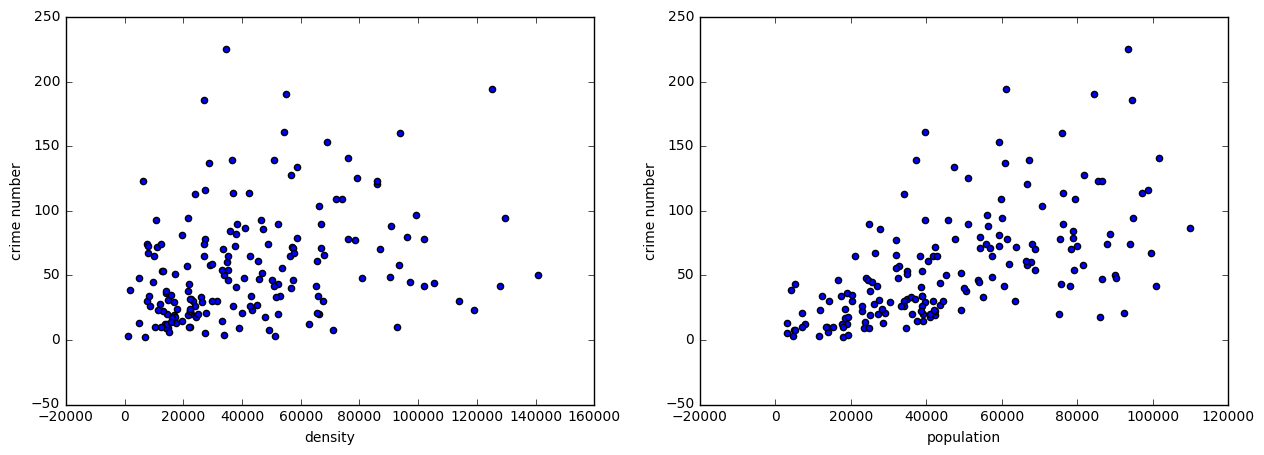

In [288]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.xlabel("density")
plt.ylabel("crime number")
plt.scatter(den,cri)
plt.subplot(122)
plt.xlabel("population")
plt.ylabel("crime number")
plt.scatter(pop,cri)
plt.savefig("pop_crime.jpg")
plt.show()

In [289]:
np.corrcoef(pop,cri)

array([[ 1.       ,  0.5923233],
       [ 0.5923233,  1.       ]])

In [290]:
np.corrcoef(den,cri)

array([[ 1.        ,  0.30471669],
       [ 0.30471669,  1.        ]])

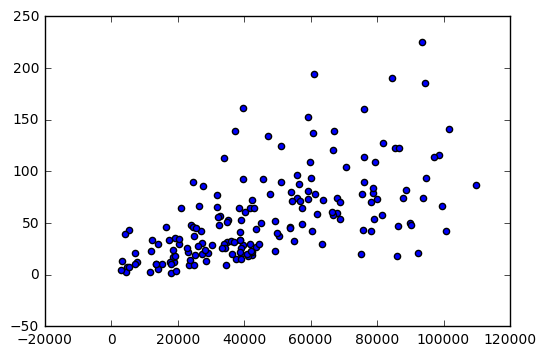

In [242]:
plt.scatter(pop,cri)
plt.show()

In [270]:
np.dot(pop,cri)/(np.sqrt(np.dot(pop,pop)*np.dot(cri,cri)))

0.87072576026025095

In [271]:
np.dot(den,cri)/(np.sqrt(np.dot(den,den)*np.dot(cri,cri)))

0.75998402183737379